In [1]:
import pandas as pd
import os
import csv
import stellargraph as sg
from stellargraph.mapper import FullBatchNodeGenerator
import networkx as nx
from tensorflow.keras import layers, optimizers, losses, metrics, Model
from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import pandas as pd
from gensim.models import Word2Vec
import sys
from stellargraph.layer import GAT

In [2]:
graph = nx.read_gml('no_relations_graph.gml')
node_subjects = nx.get_node_attributes(graph,'table_name')

In [3]:
index_list = [*range(0, 2420, 1)] 
node_subjects= pd.Series(list(node_subjects.values()), index = index_list, name= "table_name")
print(node_subjects)

0       classroom
1       classroom
2       classroom
3       classroom
4       classroom
          ...    
2415    time_slot
2416    time_slot
2417    time_slot
2418    time_slot
2419    time_slot
Name: table_name, Length: 2420, dtype: object


In [4]:
train_subjects, test_subjects = model_selection.train_test_split(
    node_subjects, train_size=0.8, test_size=None, stratify=node_subjects
)
val_subjects, test_subjects = model_selection.train_test_split(
    test_subjects, train_size=0.5, test_size=None, stratify=test_subjects
)

In [5]:
from collections import Counter

Counter(train_subjects)

Counter({'student': 1600,
         'classroom': 24,
         'instructor': 40,
         'course': 160,
         'time_slot': 16,
         'department': 16,
         'section': 80})

In [6]:
target_encoding = preprocessing.LabelBinarizer()

train_targets = target_encoding.fit_transform(train_subjects)
val_targets = target_encoding.transform(val_subjects)
test_targets = target_encoding.transform(test_subjects)

In [7]:
def convertTheTypes(df_read):
    df = df_read.astype({"index": "int64"})
    as_list = df_read.value.to_list()
    #print(as_list)
    for i in range(0,len(df_read)):
        string_holder = as_list[i].replace(",","")
        #np.fromstring(string_holder[1:len(string_holder)-1], dtype=float, sep=' ')
        df['value'][i] = np.fromstring(string_holder[1:len(string_holder)-1], dtype=float, sep=' ')
    return df

In [8]:
holder = 0
list_valid= [1,2,3,4,5]
while holder not in list_valid:
    print("Select the type of feature vector representation of every node:\n1) One Hot Encoding \n2) Doc2Vec\n3) Word2Vec\n4) TF-IDF\n5) Bow\n")
    holder= int(input())
    if holder == 1:
        matrix=[]
        for i in range(0,len(node_subjects)):
            vecForEach = np.zeros(len(node_subjects)) 
            vecForEach[i] = 1
            matrix.append(vecForEach)

        index = [*range(0,len(node_subjects),1)]
        list_of_tuples = list(zip(index, matrix))
        df = pd.DataFrame(list_of_tuples, 
                  columns = ['index', 'value'])   
    if holder == 2:
        df_read = pd.read_csv('output_doc2vec.csv')
        print(df_read)
        df = convertTheTypes(df_read)        
        print(df)
        
    if holder == 3:
        df_read = pd.read_csv('output_word2vec.csv')
       # print(df_read.value.to_list())
        df = convertTheTypes(df_read)        
        print(df)
    if holder == 4:
        df_read = pd.read_csv('output_tfidf.csv')
        print(df_read)
        df = convertTheTypes(df_read)        
        print(df)       
    if holder == 5:
        df_read = pd.read_csv('output_bow.csv')
        print(df_read)
        df = convertTheTypes(df_read)        
        print(df)

Select the type of feature vector representation of every node:
1) One Hot Encoding 
2) Doc2Vec
3) Word2Vec
4) TF-IDF
5) Bow

5
      Unnamed: 0  index                                              value
0              0      0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1              1      1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2              2      2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3              3      3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4              4      4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
...          ...    ...                                                ...
2415        2415   2415  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2416        2416   2416  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2417        2417   2417  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2418        2418   2418  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2419        2419   2419  [0, 0, 0, 0, 0, 0, 0, 

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


      Unnamed: 0  index                                              value
0              0      0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1              1      1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2              2      2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3              3      3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4              4      4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
...          ...    ...                                                ...
2415        2415   2415  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2416        2416   2416  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2417        2417   2417  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2418        2418   2418  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2419        2419   2419  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

[2420 rows x 3 columns]


In [9]:
#add w2v_df value to corresponding node in the graph
i=0
for u,outer_d in graph.nodes(data=True):
    #print(type(df.iloc[i]['value']))
    outer_d['val'] = df.iloc[i]['value']
    i+=1

In [10]:
G = sg.StellarGraph.from_networkx(graph,node_features="val")
G.info()

'StellarGraph: Undirected multigraph\n Nodes: 2420, Edges: 34548\n\n Node types:\n  default: [2420]\n    Features: float32 vector, length 4308\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [34548]\n        Weights: all 1 (default)\n        Features: none'

In [11]:
generator = FullBatchNodeGenerator(G, method="gat")

In [12]:
train_gen = generator.flow(train_subjects.index, targets=train_targets, use_ilocs=True) 

In [13]:
gat = GAT(
    layer_sizes=[8, train_targets.shape[1]],
    activations=["elu", "softmax"],
    attn_heads=8,
    generator=generator,
    in_dropout=0.5,
    attn_dropout=0.5,
    normalize=None,
)

In [14]:
x_inp, predictions = gat.in_out_tensors()

In [15]:
model = Model(inputs=x_inp, outputs=predictions)
model.compile(
    optimizer=optimizers.Adam(lr=0.005),
    loss=losses.categorical_crossentropy,
    metrics=["acc"],
)

In [16]:
val_gen = generator.flow(val_subjects.index, val_targets, use_ilocs=True)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

if not os.path.isdir("logs"):
    os.makedirs("logs")
es_callback = EarlyStopping(
    monitor="val_acc", patience=20
)  # patience is the number of epochs to wait before early stopping in case of no further improvement
mc_callback = ModelCheckpoint(
    "logs/best_model.h5", monitor="val_acc", save_best_only=True, save_weights_only=True
)

In [18]:
history = model.fit(
    train_gen,
    epochs=50,
    validation_data=val_gen,
    verbose=2,
    shuffle=False,  # this should be False, since shuffling data means shuffling the whole graph
    callbacks=[es_callback, mc_callback],
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1 steps, validate for 1 steps
Epoch 1/50
1/1 - 6s - loss: 1.9467 - acc: 0.0857 - val_loss: 1.8673 - val_acc: 0.8264
Epoch 2/50
1/1 - 1s - loss: 1.8651 - acc: 0.8326 - val_loss: 1.7822 - val_acc: 0.8264
Epoch 3/50
1/1 - 1s - loss: 1.7799 - acc: 0.8306 - val_loss: 1.6903 - val_acc: 0.8264
Epoch 4/50
1/1 - 1s - loss: 1.6694 - acc: 0.8311 - val_loss: 1.5920 - val_acc: 0.8264
Epoch 5/50
1/1 - 1s - loss: 1.6070 - acc: 0.8295 - val_loss: 1.4893 - val_acc: 0.8264
Epoch 6/50
1/1 - 1s - loss: 1.5032 - acc: 0.8290 - val_loss: 1.3835 - val_acc: 0.8264
Epoch 7/50
1/1 - 1s - loss: 1.4383 - acc: 0.8275 - val_loss: 1.2769 - val_acc: 0.8264
Epoch 8/50
1/1 - 1s - loss: 1.2770 - acc: 0.8311 - val_loss: 1.1714 - val_acc: 0.8264
Epoch 9/50
1/1 - 1s - loss: 1.2106 - acc: 0.8270 - val_loss: 1.0699 - val_acc: 0.8264
Epoch 10/50
1/1 - 1s - loss: 1.0923 - acc: 0.8275 - val_loss: 0.9749 - val_acc: 0.8264
Epoch 11/50
1/1 - 1s - loss: 0.9186 - acc: 0.8270

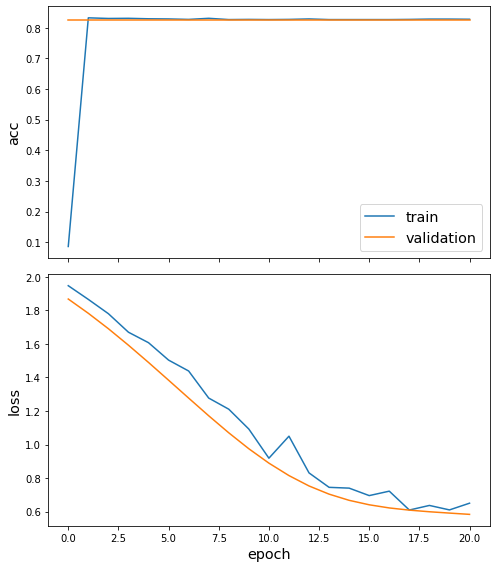

In [19]:
sg.utils.plot_history(history)

In [20]:
model.load_weights("logs/best_model.h5")

In [21]:
test_gen = generator.flow(test_subjects.index, test_targets, use_ilocs=True)

In [22]:
test_metrics = model.evaluate(test_gen)
print("\nTest Set Metrics:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

  ...
    to  
  ['...']
1/1 [==============================] - 0s 388ms/step - loss: 1.8669 - acc: 0.8264

Test Set Metrics:
	loss: 1.8669
	acc: 0.8264


In [23]:
all_nodes = node_subjects.index
all_gen = generator.flow(all_nodes, use_ilocs=True)
all_predictions = model.predict(all_gen)

In [24]:
node_predictions = target_encoding.inverse_transform(all_predictions.squeeze())

In [25]:
df = pd.DataFrame({"Predicted": node_predictions, "True": node_subjects})
df.head(20)

,Predicted,True
0,student,classroom
1,student,classroom
2,student,classroom
3,student,classroom
4,student,classroom
5,student,classroom
6,student,classroom
7,student,classroom
8,student,classroom
9,instructor,classroom


In [26]:
emb_layer = next(l for l in model.layers if l.name.startswith("graph_attention"))
print(
    "Embedding layer: {}, output shape {}".format(emb_layer.name, emb_layer.output_shape)
)

Embedding layer: graph_attention_sparse, output shape (1, 2420, 64)


In [27]:
embedding_model = Model(inputs=x_inp, outputs=emb_layer.output)

In [28]:
emb = embedding_model.predict(all_gen)
emb.shape

(1, 2420, 64)

In [29]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

In [30]:
X = emb.squeeze()
y = np.argmax(target_encoding.transform(node_subjects), axis=1)

In [31]:
if X.shape[1] > 2:
    transform = TSNE  # PCA

    trans = transform(n_components=2)
    emb_transformed = pd.DataFrame(trans.fit_transform(X), index=list(G.nodes()))
    emb_transformed["label"] = y
else:
    emb_transformed = pd.DataFrame(X, index=list(G.nodes()))
    emb_transformed = emb_transformed.rename(columns={"0": 0, "1": 1})
    emb_transformed["label"] = y

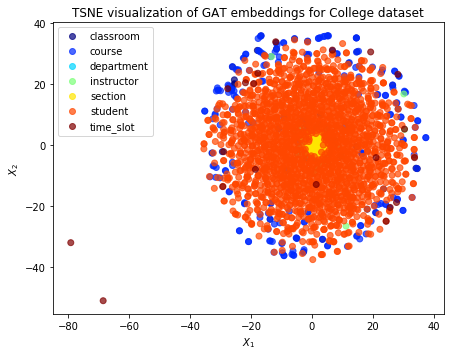

In [35]:
alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))
scatter = ax.scatter(
    emb_transformed[0],
    emb_transformed[1],
    c=emb_transformed["label"].astype("category"),
    cmap="jet",
    alpha=alpha,
)
classes = ['classroom', 'course','department','instructor','section', 'student','time_slot']

ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(
    "{} visualization of GAT embeddings for College dataset".format(transform.__name__)
)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()